<a href="https://colab.research.google.com/github/chittella369/BITS-DeepLearning/blob/main/Human_Activity_Recognition_Time_Series_Classification_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DL Assignment Groups 72 : Assignment 2: Problem - 2

SRIKANTH LAKKOJU - 2018ah04542

A N PRASAD CHITTELLA - 2018ah04615

VENKATESHWARLU BOMMAGANI - 2018ah04045


# 1. Import Libraries/Dataset (0.5 marks)
a. Import required libraries (recommended- use keras library).

b. Check the GPU available (recommended- use free GPU provided by Google Colab).

<b> Problem Statement : Human Activity Recognition Time Series Classification (13 marks) </b>

Human Activity Recognition (HAR) using smartphones dataset. Classifying the type of movement amongst six
categories:
1. Walking
2. Walking Upstairs
3. Walking Downstairs
4. Sitting
5. Standing
6. Laying

Compared to a classical approach, using Long Short-Term Memory cells (LSTMs) requires no or almost no feature
engineering. Data can be fed directly into the neural network who acts like a black box, modeling the problem
correctly.
Watch Video to get an understanding how data is being made:
 https://www.youtube.com/watch?v=XOEN9W05_4A&feature=youtu.be&ab_channel=JorgeLuisReyesOrtiz 

<b> Details about the input data </b>

We will be using an LSTM and CNN + LSTM model on the data to learn (as a cellphone attached on the waist) to
recognise the type of activity that the user is doing. The dataset's description goes like this:
The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in
fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings (features) per window). The sensor
acceleration signal, which has gravitational and body motion components, was separated using a Butterworth
low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency
components, therefore a filter with 0.3 Hz cutoff frequency was used.
There are three main signal types in the raw data: total acceleration, body acceleration, and body gyroscope. Each
has 3 axises of data. This means that there are a total of nine variables for each time step.

Prepare a python notebook (recommended- use Google Colab) to develop a Long Short-Term Memory Recurrent
Neural Network and a one-dimensional Convolutional Neural Network LSTM, or CNN-LSTM, model . Read the
instructions carefully.

In [ ]:
# a. Import required libraries (recommended- use keras library).

import os 
import tensorflow as tf
import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.optimizers import *
import math
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)
tfds.disable_progress_bar()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# lstm model for the har dataset
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras import backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model, model_from_json
from keras.metrics import CategoricalAccuracy, CategoricalCrossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report

from numpy.random import seed
from tensorflow.random import set_seed

In [ ]:
# b. Check the GPU available (recommended- use free GPU provided by Google Colab).

!nvidia-smi
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Tue Jan 19 06:30:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 2. Data Pre-processing (0.5+0.5+0.5+1=2.5 marks)

You need to define several functions which can be used to load the dataset and bring it in trainable format.

**a. Load file**

**i.** The signals are stored in the Inertial Signals directory under the train and test subdirectories. The
input data is in CSV format where columns are separated by whitespace. Write a function to load
the file as a NumPy array.

**b. Load group**

**i.** Write a function to load all data for a given group (train or test) into a single three-dimensional
NumPy array, where the dimensions of the array are [samples, time steps, features]. (You can
use the dstack() NumPy function to stack each of the loaded 3D arrays into a single 3D array
where the variables are separated on the third dimension (features).)

**ii.** features = ['total_acc_x', 'total_acc_y', 'total_acc_z’, 'body_acc_x', ‘body_acc_y’, 'body_acc_z',
'body_gyro_x', 'body_gyro_y', 'body_gyro_z'].

**c. Load dataset group**

**i.** Write a function that loads all input signal data and the output data for a single group using the
consistent naming conventions between the directories.

**d. Load dataset**

**i.** Write a function that returns the train and test X and y elements ready for fitting and evaluating
the defined models.

**ii.** Print the shapes of train and test data. (number of samples x number of timestamps x number of
features which should be : (number of samples x 128 x 9)


# a. Load file

i. The signals are stored in the Inertial Signals directory under the train and test subdirectories. The input data is in CSV format where columns are separated by whitespace. 

Write a function to load the file as a NumPy array.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive 
# This will prompt for authorization.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/DL_Assignment_1/Assignment2

/content/gdrive/MyDrive/Colab Notebooks/DL_Assignment_1/Assignment2


In [ ]:
# To check dataset in google drive using ls command.
!ls "./HARDataset"

test  train


In [ ]:
from subprocess import check_output
print("Here are the test input datasets: \n")
print(check_output(["ls", "./HARDataset/test/Inertial Signals"]).decode("utf8"))
print(check_output(["ls", "./HARDataset/test/y_test.txt"]).decode("utf8"))

print("Here are the train input datasets: \n")
print(check_output(["ls", "./HARDataset/train/Inertial Signals"]).decode("utf8"))
print(check_output(["ls", "./HARDataset/train/y_train.txt"]).decode("utf8"))

print("Python Version: ")
!python -V

Here are the test input datasets: 

body_acc_x_test.txt
body_acc_y_test.txt
body_acc_z_test.txt
body_gyro_x_test.txt
body_gyro_y_test.txt
body_gyro_z_test.txt
total_acc_x_test.txt
total_acc_y_test.txt
total_acc_z_test.txt

./HARDataset/test/y_test.txt

Here are the train input datasets: 

body_acc_x_train.txt
body_acc_y_train.txt
body_acc_z_train.txt
body_gyro_x_train.txt
body_gyro_y_train.txt
body_gyro_z_train.txt
total_acc_x_train.txt
total_acc_y_train.txt
total_acc_z_train.txt

./HARDataset/train/y_train.txt

Python Version: 
Python 3.6.9


In [ ]:
activities = {
    1: 'Walking',
    2: 'Walking Upstairs',
    3: 'Walking Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

In [ ]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [ ]:
data_total_acc_x_train = load_file('./HARDataset/train/Inertial Signals/total_acc_x_train.txt')
data_total_acc_y_train = load_file('./HARDataset/train/Inertial Signals/total_acc_y_train.txt')
data_total_acc_z_train = load_file('./HARDataset/train/Inertial Signals/total_acc_z_train.txt')

data_body_acc_x_train = load_file('./HARDataset/train/Inertial Signals/body_acc_x_train.txt')
data_body_acc_y_train = load_file('./HARDataset/train/Inertial Signals/body_acc_y_train.txt')
data_body_acc_z_train = load_file('./HARDataset/train/Inertial Signals/body_acc_z_train.txt')

data_body_gyro_x_train = load_file('./HARDataset/train/Inertial Signals/body_gyro_x_train.txt')
data_body_gyro_y_train = load_file('./HARDataset/train/Inertial Signals/body_gyro_y_train.txt')
data_body_gyro_z_train = load_file('./HARDataset/train/Inertial Signals/body_gyro_z_train.txt')

print("Shape of total_acc_x_train:", data_total_acc_x_train.shape)
print("Shape of total_acc_y_train:", data_total_acc_y_train.shape)
print("Shape of total_acc_z_train:", data_total_acc_z_train.shape)
print("Shape of body_acc_x_train:", data_body_acc_x_train.shape)
print("Shape of body_acc_y_train:", data_body_acc_y_train.shape)
print("Shape of body_acc_z_train:", data_body_acc_z_train.shape)
print("Shape of body_gyro_x_train:", data_body_gyro_x_train.shape)
print("Shape of body_gyro_y_train:", data_body_gyro_y_train.shape)
print("Shape of body_gyro_z_train:", data_body_gyro_z_train.shape)

Shape of total_acc_x_train: (7352, 128)
Shape of total_acc_y_train: (7352, 128)
Shape of total_acc_z_train: (7352, 128)
Shape of body_acc_x_train: (7352, 128)
Shape of body_acc_y_train: (7352, 128)
Shape of body_acc_z_train: (7352, 128)
Shape of body_gyro_x_train: (7352, 128)
Shape of body_gyro_y_train: (7352, 128)
Shape of body_gyro_z_train: (7352, 128)


In [ ]:
data_total_acc_x_test = load_file('./HARDataset/test/Inertial Signals/total_acc_x_test.txt')
data_total_acc_y_test = load_file('./HARDataset/test/Inertial Signals/total_acc_y_test.txt')
data_total_acc_z_test = load_file('./HARDataset/test/Inertial Signals/total_acc_z_test.txt')

data_body_acc_x_test = load_file('./HARDataset/test/Inertial Signals/body_acc_x_test.txt')
data_body_acc_y_test = load_file('./HARDataset/test/Inertial Signals/body_acc_y_test.txt')
data_body_acc_z_test = load_file('./HARDataset/test/Inertial Signals/body_acc_z_test.txt')

data_body_gyro_x_test = load_file('./HARDataset/test/Inertial Signals/body_gyro_x_test.txt')
data_body_gyro_y_test = load_file('./HARDataset/test/Inertial Signals/body_gyro_y_test.txt')
data_body_gyro_z_test = load_file('./HARDataset/test/Inertial Signals/body_gyro_z_test.txt')

print("Shape of total_acc_x_test:", data_total_acc_x_test.shape)
print("Shape of total_acc_y_test:", data_total_acc_y_test.shape)
print("Shape of total_acc_z_test:", data_total_acc_z_test.shape)
print("Shape of body_acc_x_test:", data_body_acc_x_test.shape)
print("Shape of body_acc_y_test:", data_body_acc_y_test.shape)
print("Shape of body_acc_z_test:", data_body_acc_z_test.shape)
print("Shape of body_gyro_x_test:", data_body_gyro_x_test.shape)
print("Shape of body_gyro_y_test:", data_body_gyro_y_test.shape)
print("Shape of body_gyro_z_test:", data_body_gyro_z_test.shape)

Shape of total_acc_x_test: (2947, 128)
Shape of total_acc_y_test: (2947, 128)
Shape of total_acc_z_test: (2947, 128)
Shape of body_acc_x_test: (2947, 128)
Shape of body_acc_y_test: (2947, 128)
Shape of body_acc_z_test: (2947, 128)
Shape of body_gyro_x_test: (2947, 128)
Shape of body_gyro_y_test: (2947, 128)
Shape of body_gyro_z_test: (2947, 128)


# b. Load group

i. Write a function to load all data for a given group (train or test) into a single three-dimensional NumPy array, where the dimensions of the array are [samples, time steps, features]. (You can use the dstack() NumPy function to stack each of the loaded 3D arrays into a single 3D array where the variables are separated on the third dimension (features).)

ii. features = ['total_acc_x', 'total_acc_y', 'total_acc_z’, 'body_acc_x', ‘body_acc_y’, 'body_acc_z', 'body_gyro_x', 'body_gyro_y', 'body_gyro_z'].

In [ ]:
# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

# c. Load dataset group

i. Write a function that loads all input signal data and the output data for a single group using the consistent naming conventions between the directories.

In [ ]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    #print('filepath',filepath)
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt',
    'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt',
    'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt',
    'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

# d. Load dataset

i. Write a function that returns the train and test X and y elements ready for fitting and evaluating the defined models.

ii. Print the shapes of train and test data. (number of samples x number of timestamps x number of features which should be : (number of samples x 128 x 9)

In [ ]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + './HARDataset/')
    #print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + './HARDataset/')
    #print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print('X_Train Shape:',trainX.shape)
    print('y_Train Shape:', trainy.shape)
    print('X_Test Shape:', testX.shape)
    print('y_Test Shape:', testy.shape)
    return trainX, trainy, testX, testy

In [ ]:
# load the dataset, returns train and test X and y elements
def load_dataset_visual(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + './HARDataset/')
    #print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + './HARDataset/')
    #print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    print('X_Train Shape:',trainX.shape)
    print('y_Train Shape:', trainy.shape)
    print('X_Test Shape:', testX.shape)
    print('y_Test Shape:', testy.shape)
    return trainX, trainy, testX, testy

In [ ]:
trainX, trainy, testX, testy = load_dataset()

X_Train Shape: (7352, 128, 9)
y_Train Shape: (7352, 6)
X_Test Shape: (2947, 128, 9)
y_Test Shape: (2947, 6)


In [ ]:
X_train, y_train, X_test, y_test = load_dataset_visual()

X_Train Shape: (7352, 128, 9)
y_Train Shape: (7352, 1)
X_Test Shape: (2947, 128, 9)
y_Test Shape: (2947, 1)


# 3. Data Visualization (1 + 1 = 2 marks)

**a.** Plot line graphs for the samples from TWO classes - ‘Sitting’ and ‘ Standing’ for all 9 features of the
dataset and assign class labels to the graph as the title. (use matplotlib/seaborn/any other library).

In [ ]:

def fetchDataForLabel(X, y, activity_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(y)) if y[i] == activity_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

def overlapRemoval(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

def plotGraph(X, y):
	plt.figure()
   
	# declare the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		plt.subplot(n, 1, off+1)
		plt.plot(overlapRemoval(X[:, :, off]))
		plt.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		plt.subplot(n, 1, off+1)
		plt.plot(overlapRemoval(X[:, :, off]))
		plt.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		plt.subplot(n, 1, off+1)
		plt.plot(overlapRemoval(X[:, :, off]))
		plt.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	#plt.subplot(n, 1, n)
	#plt.plot(y)
	#plt.title('activity', y=0, loc='left')
	plt.show()
 


Plotting line graph for Sitting class samples: 
(1374, 128, 9) (1374, 1)


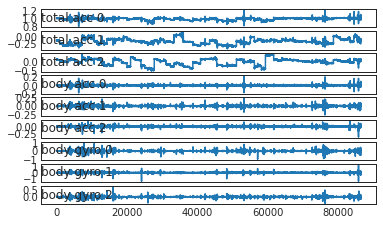

In [ ]:
#Calling Visuliazation 

plotX, plotY = fetchDataForLabel(X_train, y_train, 4)
print("Plotting line graph for Sitting class samples: ")
print(plotX.shape, plotY.shape)
plotGraph(plotX, plotY)

Plotting line graph for Standing class samples: 
(1407, 128, 9) (1407, 1)


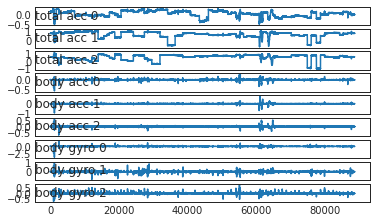

In [ ]:
plotX, plotY = fetchDataForLabel(X_train, y_train, 5)
print("Plotting line graph for Standing class samples: ")
print(plotX.shape, plotY.shape)

plotGraph(plotX, plotY)

# Model 1: Develop an LSTM Network Model (3.5 marks)



# 1. Model Building (0.3*5 = 1.5 mark)

a. Sequential Model layers- Use AT LEAST 2 LSTM layers with 90 units with appropriate input for each.

b. Add one layer of dropout at the appropriate position and give reasons.

c. Use AT LEAST 2 dense layers (one with 90 units and one for output) with the appropriate input and
output for each.

d. Choose the appropriate activation function for all the layers.

e. Print the model summary.

In [ ]:
# Function "model_LSTM_DO1" - Dropout layer created after 2nd LSTM layer
def model_LSTM_DO1(optimizer,learn_rate):
    #verbose, epochs, batch_size = 0, 15, 64
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(LSTM(90, activation='relu',input_shape=(n_timesteps,n_features), return_sequences=True))
    model.add(LSTM(90,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(90, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer(lr=learn_rate), metrics=['accuracy'])
    return model

In [ ]:
# Function "model_LSTM_DO2" - Dropout layer created after first dense layer
def model_LSTM_DO2(optimizer,learn_rate):
    #verbose, epochs, batch_size = 0, 15, 64
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(LSTM(90,activation='relu', input_shape=(n_timesteps,n_features), return_sequences=True))
    model.add(LSTM(90,activation='relu'))
    model.add(Dense(90, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_outputs, activation='softmax'))
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer(lr=learn_rate), metrics=['accuracy'])
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=model_LSTM_DO1, verbose=1)
# define the grid search parameters
#neurons = [50,100]
#activation = ['relu','tanh']
optimizer = [RMSprop]
learn_rate = [0.01, 0.1]
epochs = [10]
bs = [64]
param_grid = dict(optimizer=optimizer,learn_rate=learn_rate,batch_size=bs, epochs=epochs)

grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=3)

grid_result = grid.fit(trainX, trainy)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Epoch 1/10
77/77 [==============================] - 36s 441ms/step - loss: 189134468259865161629696.0000 - accuracy: 0.2496
Epoch 2/10
77/77 [==============================] - 31s 406ms/step - loss: 9697456780874747373158400.0000 - accuracy: 0.3448
Epoch 3/10
77/77 [==============================] - 30s 391ms/step - loss: 19968455117775784617443328.0000 - accuracy: 0.3253
Epoch 4/10
77/77 [==============================] - 32s 421ms/step - loss: 21847804038486005817278464.0000 - accuracy: 0.3064
Epoch 5/10
77/77 [==============================] - 30s 395ms/step - loss: 19674713702926827600740352.0000 - accuracy: 0.3162
Epoch 6/10
77/77 [==============================] - 30s 387ms/step - loss: 1767439911242227611860992.0000 - accuracy: 0.3157
Epoch 7/10
77/77 [==============================] - 31s 400ms/step - loss: 1755992729147894789046272.0000 - accuracy: 0.3201
Epoch 8/10
77/77 [==============================] - 33s 429ms/step - loss: 1762093088106533496029184.0000 - accuracy: 0.318

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=model_LSTM_DO2, verbose=1)
# define the grid search parameters
#neurons = [50,100]
#activation = ['relu','tanh']
optimizer = [RMSprop]
learn_rate = [0.01, 0.1]
epochs = [15]
bs = [64]
param_grid = dict(optimizer=optimizer,learn_rate=learn_rate,batch_size=bs, epochs=epochs)

grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=3)

grid_result = grid.fit(trainX, trainy)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/15
77/77 [==============================] - 37s 450ms/step - loss: 103186870769212964864.0000 - accuracy: 0.2820
Epoch 2/15
77/77 [==============================] - 31s 408ms/step - loss: 24490977205359.6133 - accuracy: 0.3575
Epoch 3/15
77/77 [==============================] - 31s 404ms/step - loss: 137126421687.7949 - accuracy: 0.4356
Epoch 4/15
77/77 [==============================] - 34s 438ms/step - loss: 10094326987509.7441 - accuracy: 0.4797
Epoch 5/15
77/77 [==============================] - 34s 447ms/step - loss: 188014.2973 - accuracy: 0.4954
Epoch 6/15
77/77 [==============================] - 31s 402ms/step - loss: 12636934430154078208.0000 - accuracy: 0.4773
Epoch 7/15
77/77 [==============================] - 30s 391ms/step - loss: 116068528961.6410 - accuracy: 0.4468
Epoch 8/15
77/77 [==============================] - 30s 396ms/step - loss: 3312184432.6330 - accuracy: 0.4710
Epoch 9/15
77/77 [==============================] - 32s 418ms/step - loss: 222855335.1346 -

# Outputs of parameters using GridsearchCV

Best: 0.231764 using {'batch_size': 64, 'epochs': 10, 'learn_rate': 0.01, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>}


Best: 0.336485 using {'batch_size': 64, 'epochs': 15, 'learn_rate': 0.01, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>}}

In [ ]:
import pandas as pd 
  
# initialise data of lists. 
data = {'Activation':['relu', 'relu'],'Loss Function':['categorical_crossentropy', 'categorical_crossentropy'], 'Batch Size':[64, 64], 'Epochs':[10, 15], 'Learn_rate':[0.01,0.01], 'Optimizer':['rmsprop','rmsprop'], 'Best Score':[0.231764,0.336485]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['model_LSTM_DO1', 'model_LSTM_DO2']) 
  
# print the data 
df 

,Activation,Loss Function,Batch Size,Epochs,Learn_rate,Optimizer,Best Score
model_LSTM_DO1,relu,categorical_crossentropy,64,10,0.01,rmsprop,0.231764
model_LSTM_DO2,relu,categorical_crossentropy,64,15,0.01,rmsprop,0.336485


From above dataframe, we can find best approximate parameters to build the model given by function " model_LSTM_DO2 ", dropout layer created after first dense layer and relu activtion function for all the layers and the best score is 0.336485 from above netwroks. We will use these values and create our baseline model.

In [ ]:
# Fucntion to evaluate the model
def evaluate_model(trainX, trainy, testX, testy, params, model):
    epochs, batch_size = params["epochs"], params["batch_size"]
    es =EarlyStopping(monitor='val_loss', patience=5)
    classifier=model()
    history = classifier.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.2, callbacks=[es])
    # evaluate model
    _, accuracy = classifier.evaluate( testX, testy, batch_size=batch_size, verbose=0)
    return history, accuracy, classifier

In [ ]:
# Fucntion to create a classifier
def create_model(model):
    classifier = KerasClassifier(model, verbose=2)
    return classifier

In [ ]:
# GridSearch
def grid(classifier):
    # define the grid search parameters
    batch_size = [128]
    epochs = [20]
    validation_split=[0.2]
    param_grid = dict(batch_size=batch_size, epochs=epochs, validation_split=validation_split)
    grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, cv=3, return_train_score=True, verbose=2)
    grid_result = grid.fit(trainX, trainy)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid_result

In [ ]:
# Function to run the model
def run_model(model, grid_result):
    history, score, classifier = evaluate_model(trainX, trainy, testX, testy, grid_result.best_params_, model)
    score = score * 100.0
    print('> %.3f' % (score))
    results=pd.DataFrame(history.history, index=history.epoch)
    return results, classifier

In [ ]:
# Function to plot loss and accuracy of train and test
def plot_loss(results):
    plt.style.use('seaborn-whitegrid')
    sns.set(style="white", font_scale = 1.5)
    fig, axes = plt.subplots(1,2, figsize=(20,10), sharex=True)
    axes[0].set_title('Loss')
    axes[0].plot(results['loss'], label='train', )
    axes[0].plot(results['val_loss'], label='test')
    axes[0].legend()
    #plot accuracy during training
    axes[1].set_title('Accuracy')
    axes[1].plot(results['accuracy'], label='train')
    axes[1].plot(results['val_accuracy'], label='test')
    axes[1].legend()
    plt.show()
    return

In [ ]:
#  Fucntion to run the model 
def run(model):
    classifier=create_model(model)
    grid_result=grid(classifier)
    results, classifier=run_model(model, grid_result)
    plot_loss(results)
    return classifier

# 1. Model Building (0.3*5 = 1.5 mark)
a. Sequential Model layers- Use AT LEAST 2 LSTM layers with 90 units with appropriate input for each.

b. Add one layer of dropout at the appropriate position and give reasons.

c. Use AT LEAST 2 dense layers (one with 90 units and one for output) with the appropriate input and
output for each.

d. Choose the appropriate activation function for all the layers.

e. Print the model summary.

# 2. Model Compilation (0.5 mark)

a. Compile the model with the appropriate loss function.

b. Use rmsprop optimizer. Give reasons for the choice of learning rate value.

c. Use accuracy as a metric.

# 3. Model Training (0.5 + 0.5 = 1 mark)
a. Train the model for an appropriate number of epochs (print the train and validation accuracy/loss for each epoch). Use the batch size of 128.

b. Plot the loss and accuracy history graphs. Print the total time taken for training.



# LSTM Network Model

In [ ]:
trainX, trainy, testX, testy = load_dataset()
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

X_Train Shape: (7352, 128, 9)
y_Train Shape: (7352, 6)
X_Test Shape: (2947, 128, 9)
y_Test Shape: (2947, 6)


From the best score of networks choosen the learning rate(0.01) which is highest score.

In [ ]:
def model_LSTM():
    seed(17)
    set_seed(17)
    K.clear_session()
    model = Sequential()
    model.add(LSTM(90, activation='relu', input_shape=(n_timesteps,n_features), return_sequences=True))
    model.add(LSTM(90,activation='relu'))
    model.add(Dense(90, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(n_outputs, activation='softmax'))
    opt = keras.optimizers.RMSprop(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 14.0min finished


Epoch 1/20
46/46 - 21s - loss: 3161449404442903381540864.0000 - accuracy: 0.2719 - val_loss: 8986663403390135959552.0000 - val_accuracy: 0.3419
Epoch 2/20
46/46 - 18s - loss: 600391115312216374509568.0000 - accuracy: 0.2034 - val_loss: 35308383806305599488.0000 - val_accuracy: 0.1448
Epoch 3/20
46/46 - 19s - loss: 425937914735338912219136.0000 - accuracy: 0.1842 - val_loss: 20666626876835624910848.0000 - val_accuracy: 0.2964
Epoch 4/20
46/46 - 18s - loss: 11574174373062118364676096.0000 - accuracy: 0.2418 - val_loss: 15372239064995236675584.0000 - val_accuracy: 0.2005
Epoch 5/20
46/46 - 18s - loss: 7495066032169055835652096.0000 - accuracy: 0.1722 - val_loss: 7692304100685904871424.0000 - val_accuracy: 0.1754
Epoch 6/20
46/46 - 18s - loss: 18539087321621037024542720.0000 - accuracy: 0.1779 - val_loss: 62293443268617393143808.0000 - val_accuracy: 0.1835
Epoch 7/20
46/46 - 18s - loss: 63871293341211092756463616.0000 - accuracy: 0.1636 - val_loss: 146883802968379648638976.0000 - val_accur

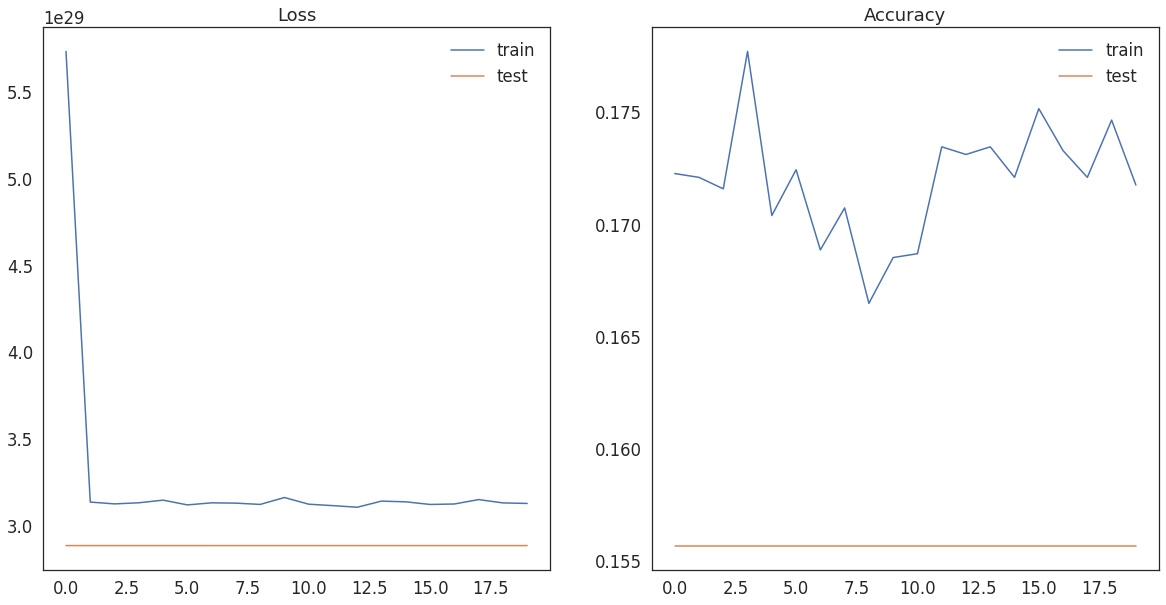



--- Time took for training is 1583.023901939392 seconds ---


In [ ]:
# Final evaluation of the model
import time 
start_time = time.time()
classifier1=run(model_LSTM)
print('\n')
print("--- Time took for training is %s seconds ---" % (time.time() - start_time))

Time took for training is 1583.023901939392 seconds

In [ ]:
classifier1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128, 90)           36000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 90)                65160     
_________________________________________________________________
dense (Dense)                (None, 90)                8190      
_________________________________________________________________
dropout (Dropout)            (None, 90)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 546       
Total params: 109,896
Trainable params: 109,896
Non-trainable params: 0
_________________________________________________________________


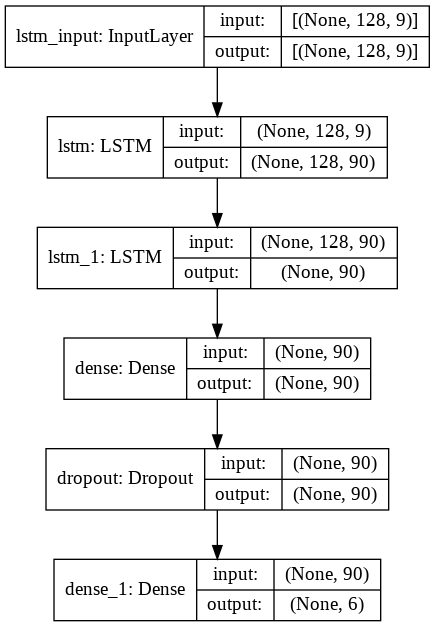

In [ ]:
plot_model(classifier1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 4. Model Evaluation (0.25 + 0.25 = 0.5 mark)

a. Print the final test/validation loss and accuracy.

b. Print confusion matrix.

In [ ]:
# Print the final test/validation loss and accuracy.
scores = classifier1.evaluate(testX, testy, verbose=0)
print("Test Loss: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

Test Loss: 281915796515420217010062098432.000000
Test Accuracy: 16.830675%


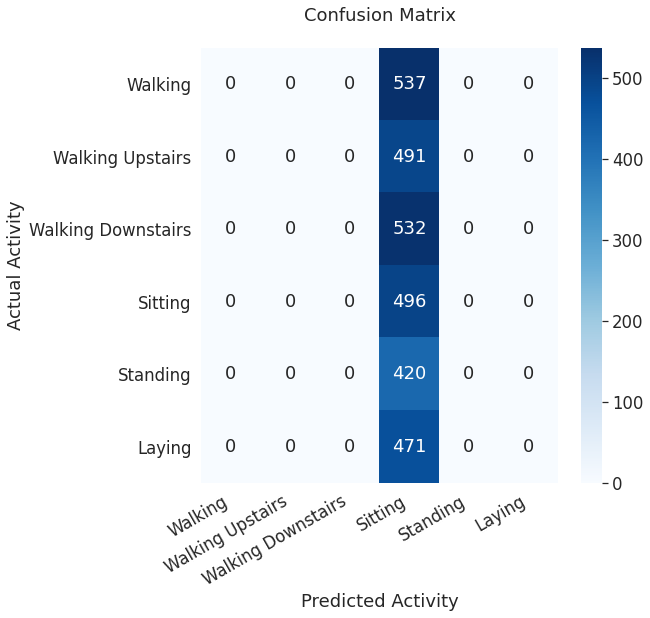

In [ ]:
# Confusion Matrix
y_pred=classifier1.predict(testX)
y_predict=pd.Series([activities[i+1] for i in np.argmax(y_pred, axis=1)])
y_actual=pd.Series([activities[i+1] for i in np.argmax(testy, axis=1)])


# Code for drawing seaborn heatmaps
class_names = list(activities.values())
df_heatmap = pd.DataFrame(confusion_matrix(y_actual, y_predict) )

plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1.5)

fig = plt.figure(figsize=(8,8))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", cmap="Blues")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=30, ha='right')
heatmap.set_xticklabels(class_names)
heatmap.set_yticklabels(class_names)
plt.ylabel('Actual Activity')
plt.xlabel('Predicted Activity')
plt.title("Confusion Matrix\n")

plt.show()

In [ ]:
# Classification Report
cr=classification_report(y_actual, y_predict, target_names=activities.values(), digits=4)
print(cr)

                    precision    recall  f1-score   support

           Walking     0.0000    0.0000    0.0000       537
  Walking Upstairs     0.0000    0.0000    0.0000       491
Walking Downstairs     0.0000    0.0000    0.0000       532
           Sitting     0.1683    1.0000    0.2881       496
          Standing     0.0000    0.0000    0.0000       420
            Laying     0.0000    0.0000    0.0000       471

          accuracy                         0.1683      2947
         macro avg     0.0281    0.1667    0.0480      2947
      weighted avg     0.0283    0.1683    0.0485      2947



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


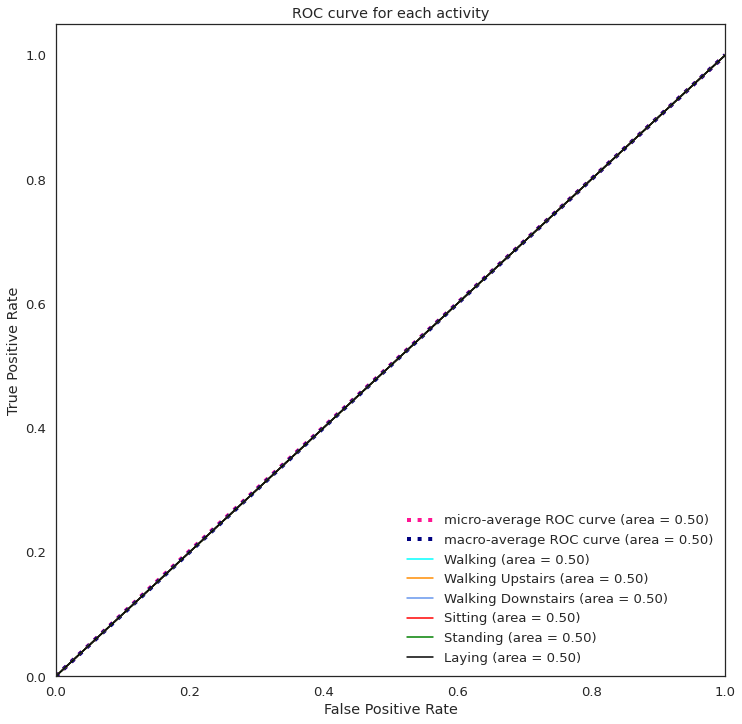

In [ ]:
# ROC AUC
n_classes = 6

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testy[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testy.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1.2)
plt.figure(figsize=(12,12))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', "red", "green", "black"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='{0} (area = {1:0.2f})'
             ''.format(activities[i+1], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for each activity')
plt.legend(loc="lower right")

plt.show()

# Model 2: Develop a CNN-LSTM Network Model (4.5 marks)
Reference: https://machinelearningmastery.com/cnn-long-short-term-memory-networks/



# 1. Model Building (0.5*5 = 2.5 mark)
a. Sequential Model layers- Use AT LEAST 2 CNN - LSTM layers with 128 Conv filters and 90 LSTM units with

b. appropriate input for each.

c. Add MaxPooling1D layer

d. Use AT LEAST 2 dense layers (one with 90 units and one for output) with the appropriate input and output for each.

e. Choose the appropriate activation function for all the layers.

f. Print the model summary.


# 2. Model Compilation (0.5 mark)
a. Compile the model with the appropriate loss function.

b. Use adam optimizer. Give reasons for the choice of learning rate value.

c. Use accuracy as metric.

# 3. Model Training (0.5 + 0.5 = 1 mark)
a. Train the model for an appropriate number of epochs (print the train and validation accuracy/loss for
each epoch). Use the batch size of 128.
b. Plot the loss and accuracy history graphs. Print the total time taken for training.

# CNN-LSTM Network Model

In [ ]:
# reshape data into time steps of sub-sequences
n_steps, n_length = 4, 32
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))

In [ ]:
trainX.shape

(7352, 4, 32, 9)

In [ ]:
testX.shape

(2947, 4, 32, 9)

In [ ]:
# Fucntion to create CNN_LSTM network
def model_CNN_LSTM():
    seed(17)
    set_seed(17)
    K.clear_session()
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(90,activation='relu', return_sequences=True))
    model.add(LSTM(90,activation='relu'))
    model.add(Dense(90, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Below output show about loss and accuracy history graphs and print the total time for training.

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.6s finished


Epoch 1/20
46/46 - 5s - loss: 1.0953 - accuracy: 0.5173 - val_loss: 0.5955 - val_accuracy: 0.6914
Epoch 2/20
46/46 - 1s - loss: 0.4121 - accuracy: 0.7839 - val_loss: 1.1081 - val_accuracy: 0.8559
Epoch 3/20
46/46 - 1s - loss: 0.3583 - accuracy: 0.8981 - val_loss: 0.4464 - val_accuracy: 0.8953
Epoch 4/20
46/46 - 1s - loss: 0.2671 - accuracy: 0.9145 - val_loss: 0.2235 - val_accuracy: 0.9361
Epoch 5/20
46/46 - 1s - loss: 0.1448 - accuracy: 0.9432 - val_loss: 0.3022 - val_accuracy: 0.9075
Epoch 6/20
46/46 - 1s - loss: 0.1187 - accuracy: 0.9546 - val_loss: 0.2964 - val_accuracy: 0.9334
Epoch 7/20
46/46 - 1s - loss: 0.0970 - accuracy: 0.9585 - val_loss: 0.2917 - val_accuracy: 0.9375
Epoch 8/20
46/46 - 1s - loss: 0.1090 - accuracy: 0.9544 - val_loss: 0.5310 - val_accuracy: 0.8756
Epoch 9/20
46/46 - 1s - loss: 0.1971 - accuracy: 0.9284 - val_loss: 0.2732 - val_accuracy: 0.9368
Epoch 10/20
46/46 - 1s - loss: 0.1128 - accuracy: 0.9536 - val_loss: 0.2372 - val_accuracy: 0.9293
Epoch 11/20
46/46 -

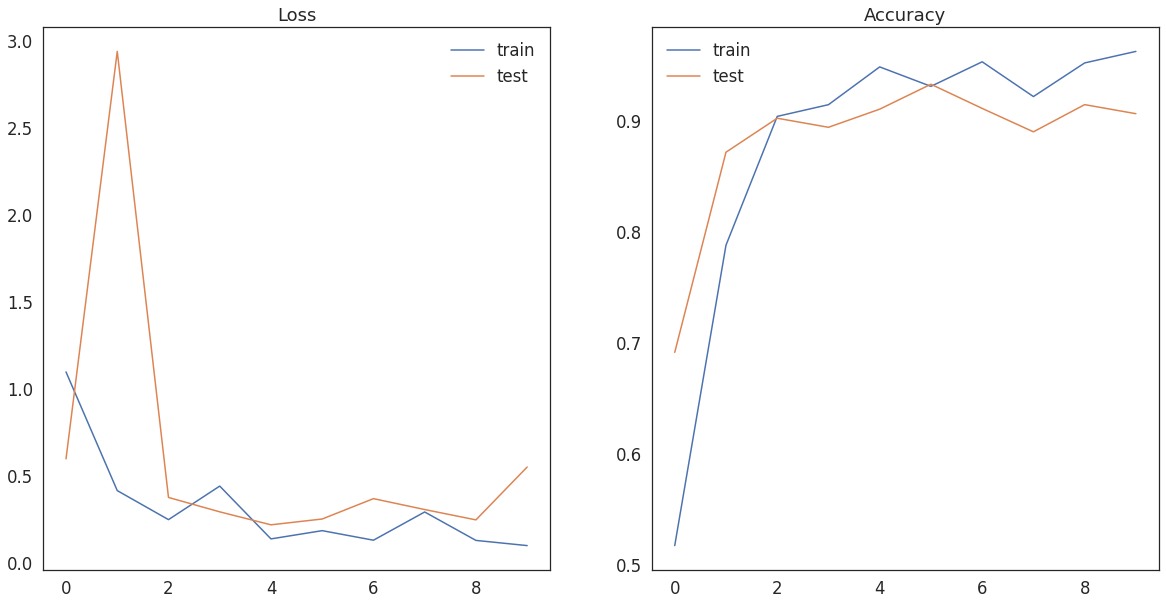



--- Time took for training is 97.30078840255737 seconds ---


In [ ]:
# Final evaluation of the model
import time 
start_time = time.time()
classifier2=run(model_CNN_LSTM)
print('\n')
print("--- Time took for training is %s seconds ---" % (time.time() - start_time))

Time took for training is 97.30078840255737 seconds

In [ ]:
# Print the model summary
classifier2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 30, 128)     3584      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 15, 128)     0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 13, 128)     49280     
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 1664)        0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 90)          631800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 90)                65160     
_________________________________________________________________
dense (Dense)                (None, 90)                8

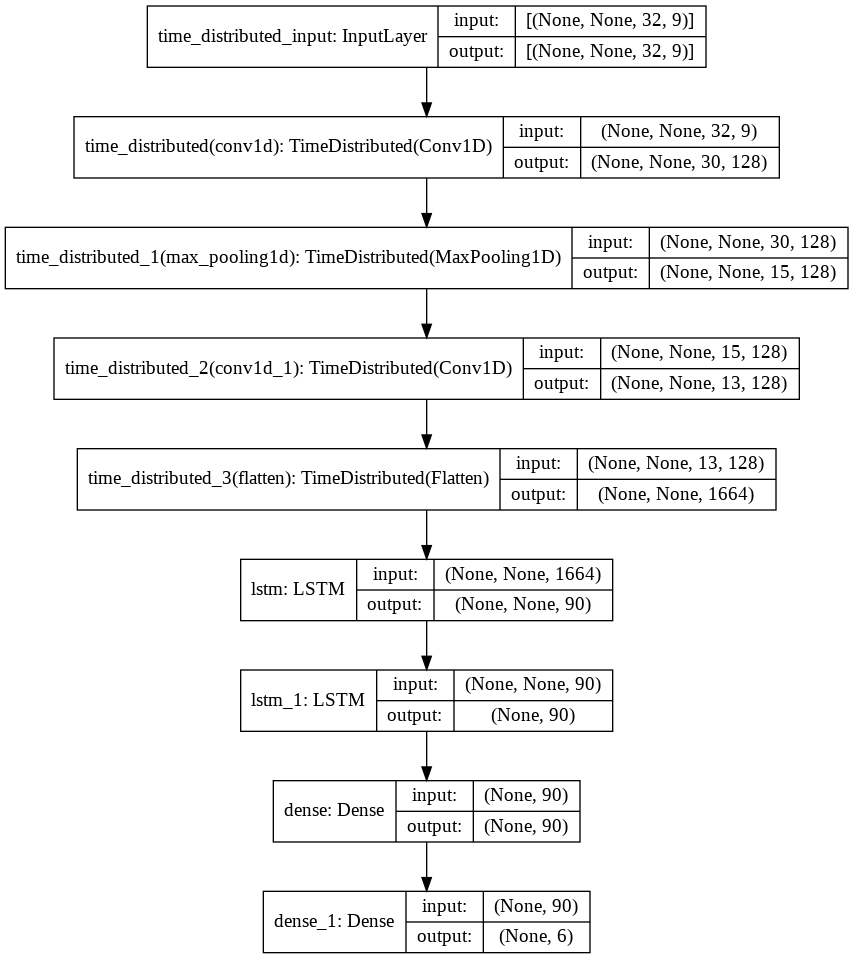

In [ ]:
plot_model(classifier2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

# 4. Model Evaluation (0.25 + 0.25 = 0.5 mark)

a. Print the final test/validation loss and accuracy

In [ ]:
# Print the final test/validation loss and accuracy.
scores = classifier2.evaluate(testX, testy, verbose=0)
print("Test Loss: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

Test Loss: 0.513089
Test Accuracy: 90.973872%


b. Print confusion matrix

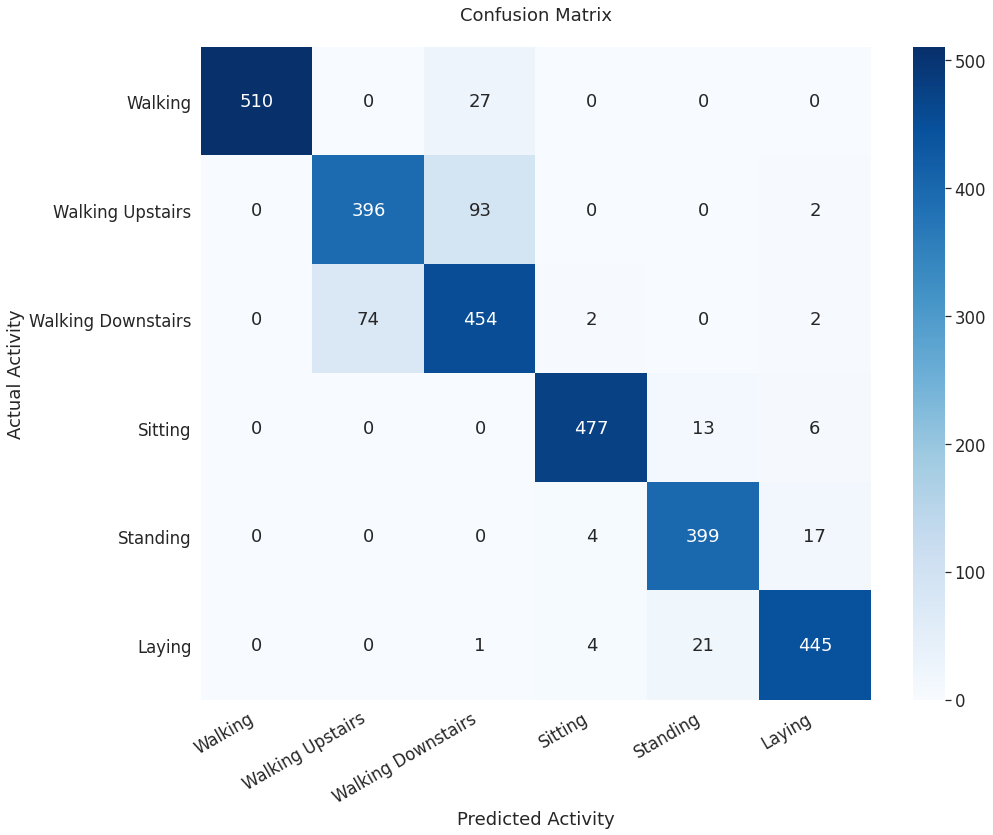

In [ ]:
# Confusion Matrix
y_pred=classifier2.predict(testX)
y_predict=pd.Series([activities[i+1] for i in np.argmax(y_pred, axis=1)])
y_actual=pd.Series([activities[i+1] for i in np.argmax(testy, axis=1)])


# Code for drawing seaborn heatmaps
class_names = list(activities.values())
df_heatmap = pd.DataFrame(confusion_matrix(y_actual, y_predict) )

plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1.5)

fig = plt.figure(figsize=(15,12))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", cmap="Blues")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=30, ha='right')
heatmap.set_xticklabels(class_names)
heatmap.set_yticklabels(class_names)
plt.ylabel('Actual Activity')
plt.xlabel('Predicted Activity')
plt.title("Confusion Matrix\n")

plt.show()

In [ ]:
# Classification Report
cr=classification_report(y_actual, y_predict, target_names=activities.values(), digits=4)
print(cr)

                    precision    recall  f1-score   support

           Walking     1.0000    0.9497    0.9742       537
  Walking Upstairs     0.8426    0.8065    0.8241       491
Walking Downstairs     0.7896    0.8534    0.8202       532
           Sitting     0.9795    0.9617    0.9705       496
          Standing     0.9215    0.9500    0.9355       420
            Laying     0.9428    0.9448    0.9438       471

          accuracy                         0.9097      2947
         macro avg     0.9126    0.9110    0.9114      2947
      weighted avg     0.9120    0.9097    0.9104      2947



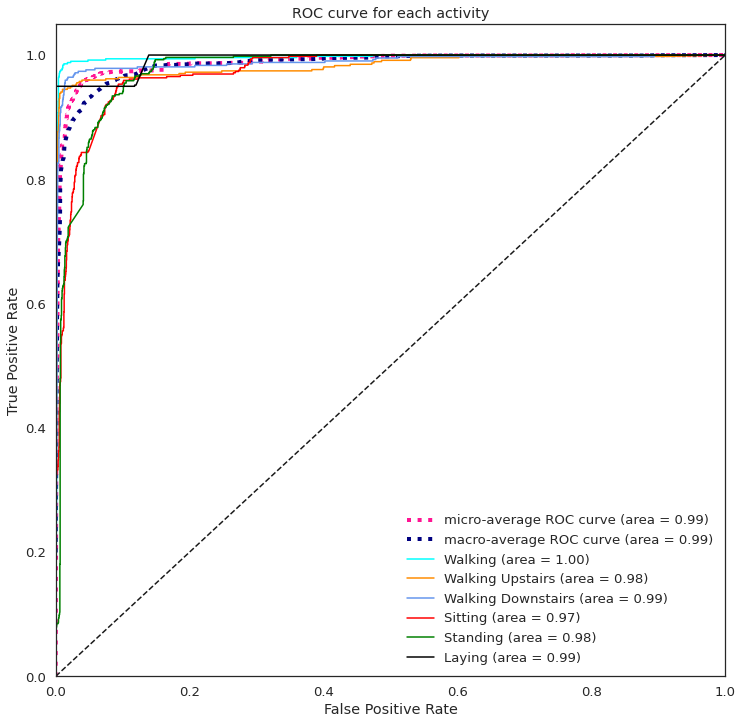

In [ ]:
# ROC AUC
n_classes = 6

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testy[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testy.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1.2)
plt.figure(figsize=(12,12))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', "red", "green", "black"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='{0} (area = {1:0.2f})'
             ''.format(activities[i+1], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for each activity')
plt.legend(loc="lower right")

plt.show()

# Evaluation process -

1. Task Response and Task Completion- All the models should be logically sound and have decent accuracy (models
with random guessing, frozen and incorrect accuracy, exploding gradients etc. will lead to deduction of marks. Please
do a sanity check of your model and results before submission). There are a lot of subparts, so answer each
completely and correctly, as no partial marks will be awarded for partially correct subparts.

2. Implementation- The model layers, parameters, hyperparameters, evaluation metrics etc. should be properly
implemented.